In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import ar2gas as gas
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
import helpers
from scipy.stats import norm
import proportions
import variogram_on_grid
import pandas as pd

In [4]:
data = gs.DataFile(flname='dataset.csv', x='x', y='y')

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

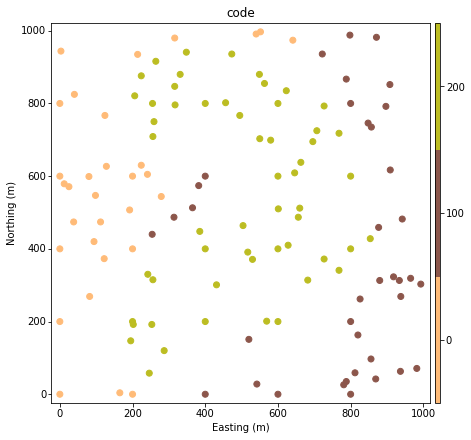

In [5]:
gs.locmap(data, x='x', y='y', figsize=(7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

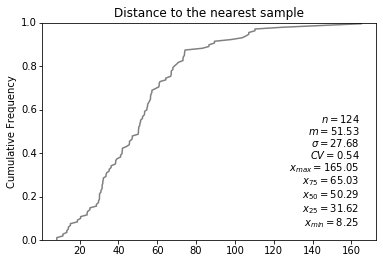

In [6]:
helpers.samples_dist(data.data.x, data.data.y, None)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

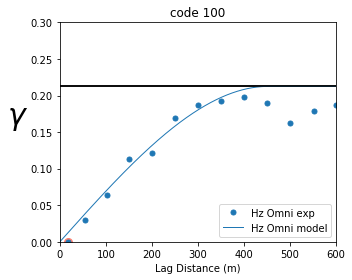

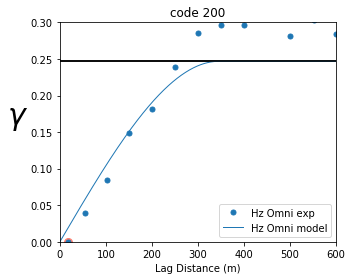

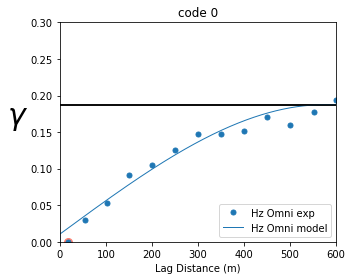

In [7]:
codes = data.data.code.unique()
#fig, axes = plt.subplots(1, 3, figsize=(15,5))
variograms = {}
for idx, c in enumerate(codes):
    data['ind_{}'.format(c)] = np.where((data['code'] == c) == True, 1, 0)
    vario = gs.Variogram(data, 'ind_{}'.format(c), ndim=2, ndir=1, omnihz=True, mute=True, warn=False)
    vario.settols(nlags=12, lagdist=50, lagtol=25)
    vario.varcalc()
    vario.fitmodel(sill=np.var(data['ind_{}'.format(c)]))
    #ax = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], axes=axes[idx], ms=5)
    fig = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], ms=5, figsize=(5,4))
    variograms['code {}'.format(int(c))] = helpers.gslibvar_to_ar2gasvar(vario.model)
    plt.tight_layout()

In [8]:
a2ggrid, gsgrid = helpers.autogrid(data.data.x, data.data.y, None, 1, 1, 1)

In [9]:
ind_krig = {}
#fig, axes = gs.subplots(1, 3, figsize=(20,5), cbar_mode='single')
ps = gas.data.PointSet(data.data.x.values, data.data.y.values, np.zeros(len(data.data.y.values)))
for idx, c in enumerate(codes):
    krig_cov = gas.compute.KrigingCovariance(1.,variograms['code {}'.format(int(c))])
    kriger = gas.compute.DualKriging.OK(krig_cov, ps, data.data['ind_{}'.format(c)], 0)
    results = np.ones(a2ggrid.size())*float('nan')
    kriger.compute(a2ggrid, results, 0)
    ind_krig['code {}'.format(int(c))] = results
    #gs.pixelplt(results, gsgrid, ax = axes[idx], title='code {}'.format(int(c)))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

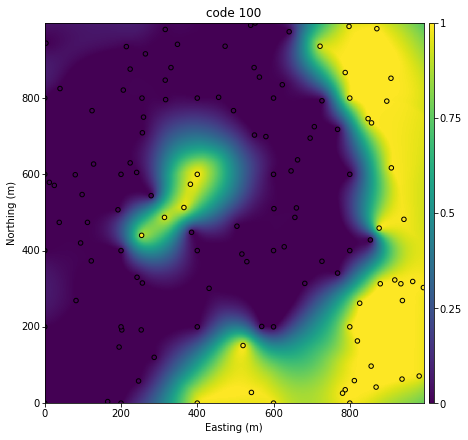

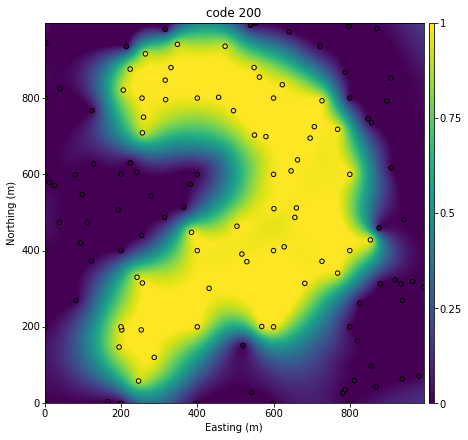

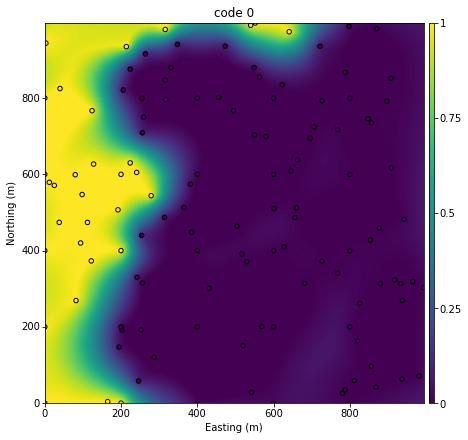

In [10]:
std_results = helpers.standardize([ind_krig['code 100'], ind_krig['code 200'], ind_krig['code 0']])
for idx, c in enumerate(codes):
    gs.pixelplt(std_results[idx], gsgrid, title='code {}'.format(int(c)), figsize = (7,7), pointdata=data, pointvar='ind_{}'.format(c), pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

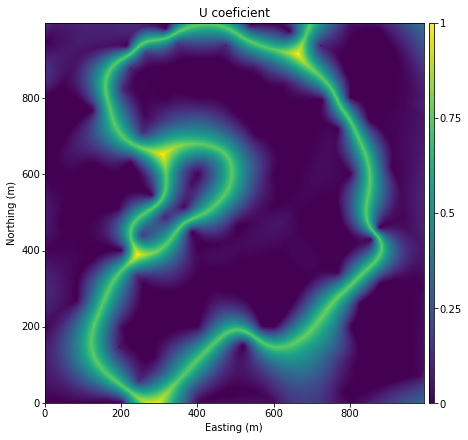

In [11]:
u = helpers.u_coef(std_results)
u_pp = gs.pixelplt(u, gsgrid, title='U coeficient', figsize = (7,7))

In [12]:
xs = np.array(a2ggrid.x_locations())
ys = np.array(a2ggrid.y_locations())

In [52]:
regular_sampling = pd.DataFrame(columns=['x','y','code'])
x_int = 20
y_int = 20
x_size = int(np.max(a2ggrid.x_locations()))
y_size = int(np.max(a2ggrid.y_locations()))

In [53]:
xarray = []
yarray = []
uarray= []
for x in range(0, x_size, x_int):
    for y in range(0, y_size, y_int):
        fx = xs == float(x)
        fy = ys == float(y)
        us = u[fx*fy]
        xarray.append(x)
        yarray.append(y)
        uarray.append(us[0])

In [54]:
reg_samp=pd.DataFrame()
reg_samp['x'] = xarray
reg_samp['y'] = yarray
reg_samp['u'] = uarray

In [55]:
data_points = pd.DataFrame()
data_points['x'] = data.data.x
data_points['y'] = data.data.y
data_points['u'] = np.zeros(ps.size())
reg_samp = reg_samp.append(data_points)
reg_samp = reg_samp.drop_duplicates()

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

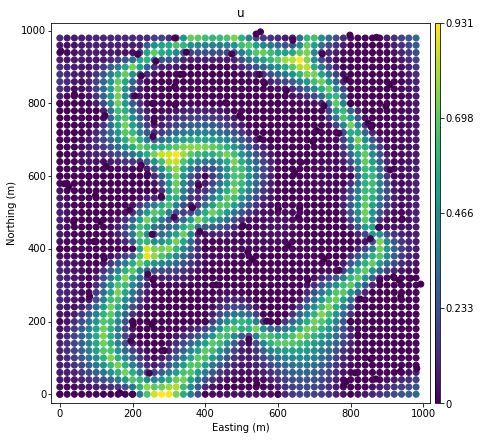

In [56]:
gs.locmap(reg_samp, x='x', y='y', var='u', figsize=(7,7))

In [57]:
gauss = gas.math.ContinuousDistribution.Gaussian(0, 1.)
data_dist = gas.math.ContinuousDistribution.NonParametric(reg_samp.u.values)
trans = gas.math.DistributionTransform(gauss, data_dist)
normal_transf = trans.forward(reg_samp.u.values)

In [66]:
var_range = 500
bb = a2ggrid.bounding_box()
anis = gas.data.AnisotropicTransformation(var_range, var_range, var_range, 0, 0, 0)
sf = gas.data.SearchFilter.no_filter()
#values = reg_samp.u.values
x, y, z = reg_samp.x.values, reg_samp.y.values, np.zeros(len(reg_samp.x.values))
ps_sampling = gas.data.PointSet(x, y, z)
nei = gas.data.KDTree(ps_sampling, 12, anis)
seed = 123257
#cov = [gas.compute.Covariance.spherical(1.0, var_range, var_range, var_range, 0., 0., 0.)]
cov = [gas.compute.Covariance.nugget(0.001), gas.compute.Covariance.gaussian(0.999, var_range, var_range, var_range, 0., 0., 0.)]

In [ ]:
tbsim = gas.compute.Tbsim.multi_realization(seed, 10, a2ggrid, 1000, cov, nei, sf, ps_sampling, normal_transf)
results = tbsim.simulate(a2ggrid, 10, 0)

In [ ]:
#results = [norm.cdf(lst) for lst in results]
results = [trans.backward(lst) for lst in results]

In [ ]:
reg_samp.to_csv('reg_samp.csv',index=False)
regsamp = gs.DataFile(flname='reg_samp.csv', x='x', y='y')

In [ ]:
gs.pixelplt(results[0], gsgrid, title='realization {}'.format(0), figsize = (7,7), pointdata=regsamp, pointvar='u', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [ ]:
gs.histplt(results[0])

In [ ]:
cat_reals = helpers.cat_sampler([ind_krig['code 200'], ind_krig['code 100'], ind_krig['code 0']], [200,100,0], results)
for i in range(0,3):
    gs.pixelplt(np.array(cat_reals[i]), gsgrid, title='realization {}'.format(i), figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [65]:
anis = gas.data.AnisotropicTransformation(1000, 1000, 1000, 0, 0, 0)
nei = gas.data.KDTree(ps, 1, anis)
sf = gas.data.SearchFilter.no_filter()
est = gas.compute.NNEstimator.KNN(nei, sf, a2ggrid, data.data.code)
target = est.compute(a2ggrid, 0)

In [51]:
#gs.pixelplt(target, gsgrid, title='NN', figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [ ]:
proportions.cat_plot(target, cat_reals, weights=None)

In [ ]:
proportions.back_flag(a2ggrid, cat_reals, data.data.x, data.data.y, None, data.data.code)

In [ ]:
ind_reals = helpers.reals_to_indicators(cat_reals)

In [ ]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_0'], 10, 10)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 0'])

In [ ]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_100'], 10, 10)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 100'])

In [ ]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_200'], 10, 10)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 200'])